In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Set/titanic_data.csv')
df_pre = df.copy()

In [3]:
df_pre = df.copy()

In [16]:
# หาค่าเฉลี่ยของอายุในแต่ละคลาส
mean_c1 = df_pre[df_pre.Pclass == 1]['Age'].mean()
mean_c2 = df_pre[df_pre.Pclass == 2]['Age'].mean()
mean_c3 = df_pre[df_pre.Pclass == 3]['Age'].mean()
print(mean_c1,mean_c2,mean_c3)

38.233440860215055 29.87763005780347 25.14061971830986


In [17]:
# ใส่ค่าเฉลี่ยของอายุในแต่ละคลาส ที่มีค่า na 
df_pre.loc[df_pre.Pclass == 1,'Age'] = df_pre[df_pre.Pclass == 1]['Age'].fillna(mean_c1)
df_pre.loc[df_pre.Pclass == 2,'Age'] = df_pre[df_pre.Pclass == 2]['Age'].fillna(mean_c2)
df_pre.loc[df_pre.Pclass == 3,'Age'] = df_pre[df_pre.Pclass == 3]['Age'].fillna(mean_c3)

In [18]:
# เปลี่ยน Embarked เป็น เลข 
df_pre.loc[(df_pre.Embarked == 'S'),'Embarked_num'] = 0
df_pre.loc[(df_pre.Embarked == 'Q'),'Embarked_num'] = 2
df_pre.loc[(df_pre.Embarked == 'C'),'Embarked_num'] = 1

In [19]:
# เปลี่ยน Sex เป็น เลข 
df_pre.loc[(df_pre.Sex == 'male'),'Sex_num'] = 0
df_pre.loc[(df_pre.Sex == 'female'),'Sex_num'] = 1


(array([100., 493., 218.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <a list of 5 Patch objects>)

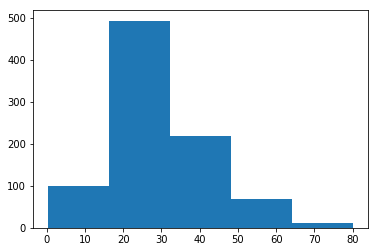

In [8]:
# ดู Histogram
plt.hist(df_pre.Age , bins = 5 )

C:\Users\Nile\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


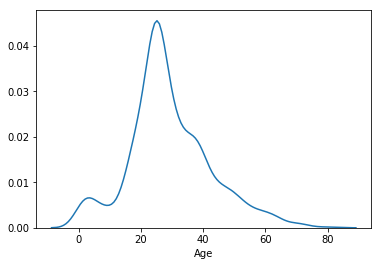

In [9]:
#plot ข้อมูลด้วย hist
sns.distplot(df_pre.Age, bins = 10 , hist = False )


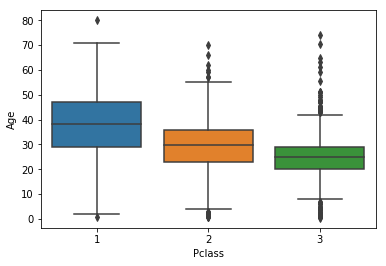

In [10]:
#plot ข้อมูลด้วย boxplot
sns.boxplot(df_pre.Pclass ,  df_pre.Age)

In [20]:
#pairplot คือการดูความสัมพันธ์ของข้อมูล ต้องให้ทุก col ไม่เป็น null ก่อน
df_pre.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Embarked_num      2
Sex_num           0
dtype: int64

In [21]:
del df_pre['Cabin']
df_pre.dropna(inplace = True)

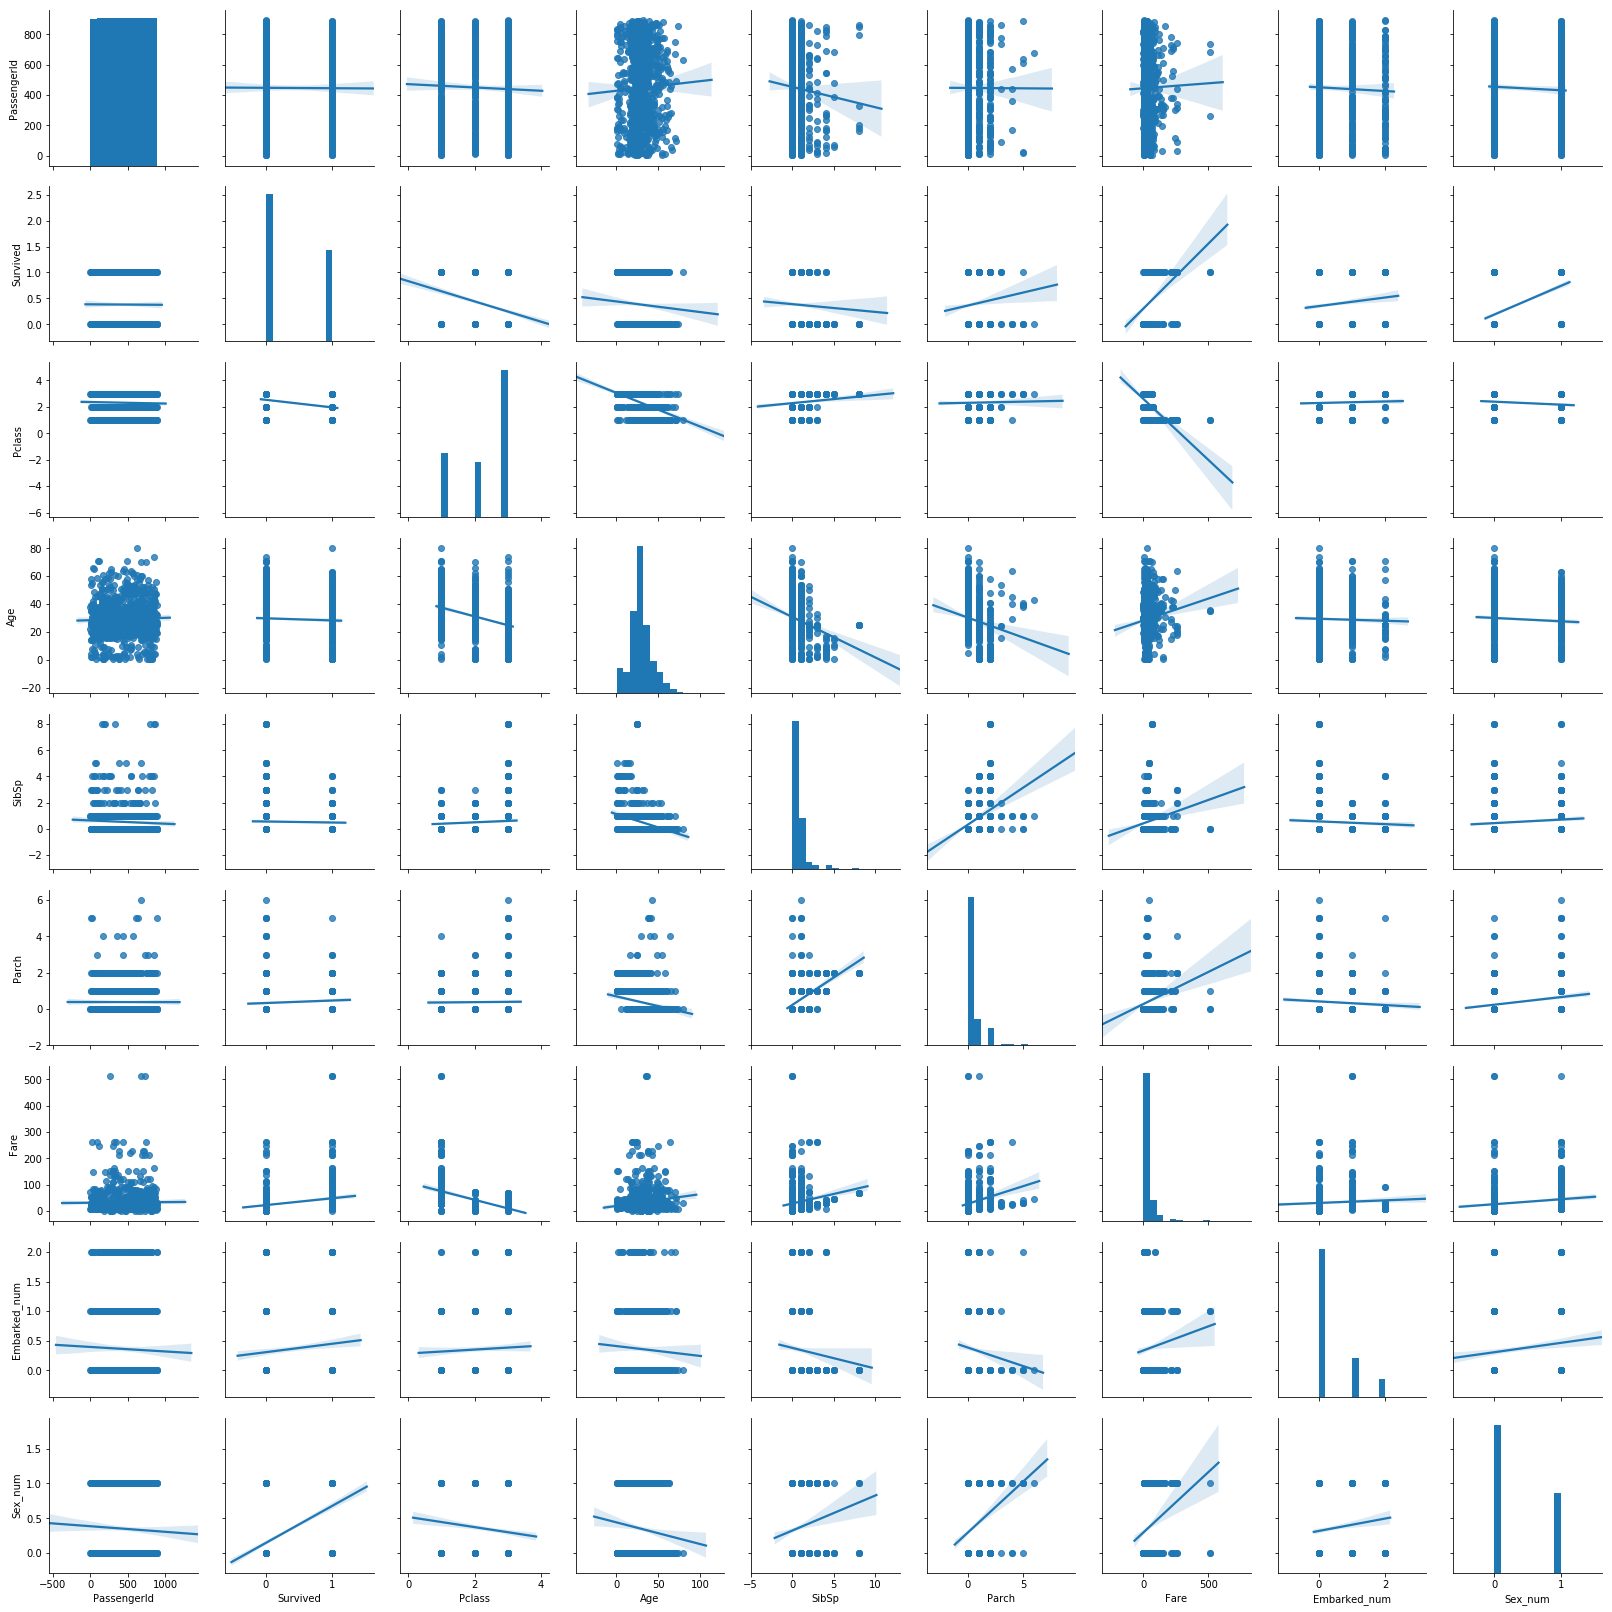

In [47]:
#pairplot
sns.pairplot(data = df_pre, kind='reg')

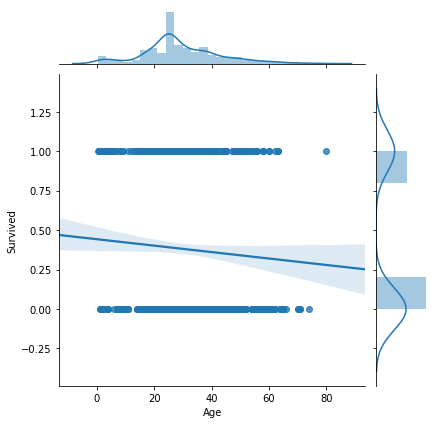

In [34]:
sns.jointplot(x='Age',y='Survived' , data = df_pre , kind = 'reg')


จากกราฟข้างบน pirepoint ติดลบ ทำให้กราฟลาดลง จึงเป็นแบบผกผันคือยิ่งอายุเยอะโอกาศรอดยิ่งน้อย 

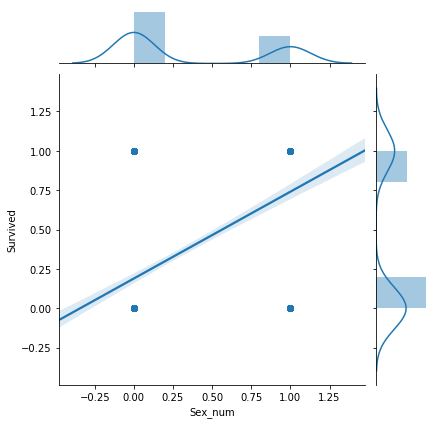

In [37]:
sns.jointplot(x='Sex_num',y='Survived' , data = df_pre , kind = 'reg')

จากกราฟข้างบน pirepoint บวก ทำให้กราฟลาดลง จึงเป็นแบบแปรผันคือยิ่งเพศชาย(1)โอกาศตายเยอะ

## Exercise: 
ถ้าเราอยากรู้ว่า hโดยสารแต่ละคลาส จากแต่ละเมือง จ่ายค่าตัวมาเท่าไรบ้าง แยกตามประเภทชาย หญิง 
กำหนดให้ใช้  factorplot และ x= ผู้โดยสารแต่ละคลาส ทั้งแบบ violin และ Bar เพื่อสังเกตุความแตกต่าง 

C:\Users\Nile\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


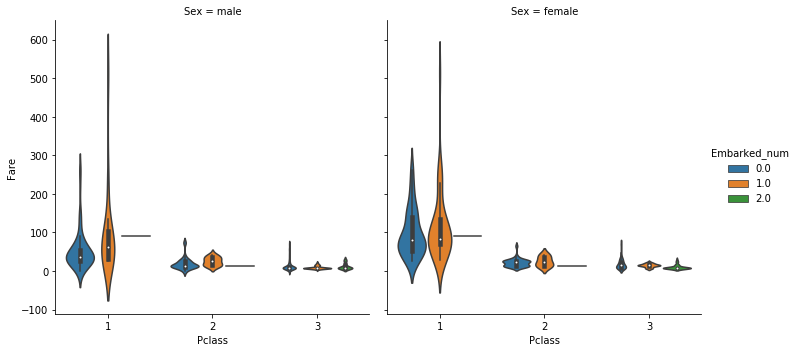

In [38]:
sns.factorplot(data = df_pre, x = 'Pclass' , y = 'Fare' ,hue = 'Embarked_num',col = 'Sex', kind = 'violin' )

C:\Users\Nile\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


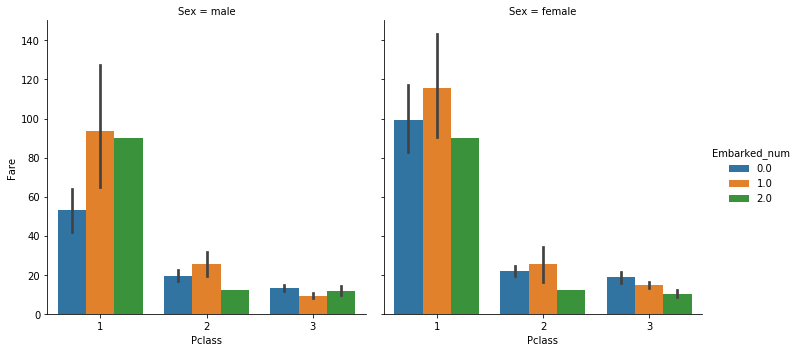

In [39]:
sns.factorplot(data = df_pre, x = 'Pclass' , y = 'Fare' ,hue = 'Embarked_num',col = 'Sex', kind = 'bar' )

## Ans 
ความต่างคือ ขีดที่อยู่ใน violin มีการแจกแจงข้อมูลที่น้อย ทำให้เป็นขีดเดียว

In [43]:
df_pre.to_csv("clear-data.csv")